
This notebook shows the spectrum result in Section 2.4.2 (Fig S5) in

    <Deriving information from missing data: implications for mood prediction>

In [1]:
from spectrum_functions import *

Load ALTAN/QIDS data in AMoSS dataset

In [2]:
test_path='./all-true-colours-matlab-2017-02-27-18-38-12-nick/'
participants_list, participants_data_list,\
        participants_time_list=loadParticipants(test_path)
Participants=make_classes(participants_data_list,participants_time_list,participants_list)
cohort=cleaning_sameweek_data(cleaning_same_data(Participants))

14050


In [19]:
if __name__ == "__main__":
    """Plots a triangle and the density map of the proportion
    of periods of time participants with a specific diagnosis
    spend in each clinical category.
    """

    random.seed(42)
    np.random.seed(42)
    path_save="./dataset_spectrum_prediction/"

    """
    Step 1

    Load the cohort. Then, take each participant
    and create a testing set (using the participant)
    and a training set (using the rest of the
    cohort) and save it as a file.
    """
    size = 20

    

    print("number of participants in the cohort:", len(cohort))
    
    # Only consider participants that provided at least 5 buckets of data
    valid_participants = [participant for participant in cohort if\
                          np.minimum(len(participant.data[0]), len(participant.data[1]))>int(size+5)]
  
    print("number of vaid participants:", len(valid_participants))
    print("Exporting participants...")
    
    for ref_participant in tqdm(valid_participants):
        # Use participant for testing
        test_participant=[ref_participant]
        diagnosis_=ref_participant.diagnosis
        # Use the remaining participants for training.
        train_participants=[participant for participant in valid_participants if participant!=ref_participant]

        # Check that ref_participant is not in train_participants
        assert ref_participant not in train_participants
        
        # Save the testing and training sets as a file
        random_id = random.randint(0, 1e8)
        export(test_participant, random_id,diagnosis_=diagnosis_)
        export(train_participants, random_id,diagnosis_=diagnosis_)
        



    """
    Step 2

    For each participant in the clinical group we are interested in,
    test the model with data from this participant. The model is
    trained using the remaining participants in the cohort.

    """



    
    folders = get_folders(path_save)
    scores = []
    print("Calculating points...")
    for folder in tqdm(folders):
        # Train the model
        model=train(path_save+folder+"/train_set.obj")

        # Test the model
        score=model.test(path_save+folder+"/test_set.obj")

        # Save the score
        scores.append((folder, score))



    """
    Step 3

    Asign each score to the corresponding clinical group

    """

    trianglePoints={
                        "bipolar":     [],
                        "healthy":     [],
                        "borderline":  []
                    }

    for id, score in scores:
        category = getCategory(id)
        trianglePoints[category].append(score)


  0%|          | 0/119 [00:00<?, ?it/s]

Calculating points...


100%|██████████| 119/119 [07:45<00:00,  4.09s/it]


The spectrum plots for QIDS prediction

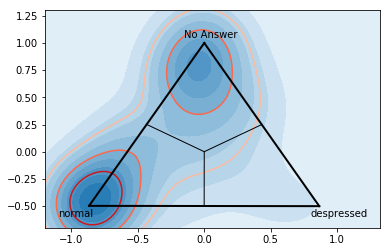

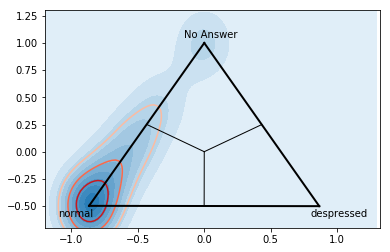

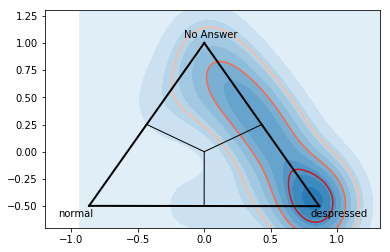

In [17]:
#qids_class
label_='despressed'
plotDensityMap(trianglePoints["bipolar"],label_=label_,title_="BD")
#trianglePoints["healthy"]=trim_triangle(trianglePoints["healthy"],index=1) 
plotDensityMap(trianglePoints["healthy"],label_=label_,title_="HC")
plotDensityMap(trianglePoints["borderline"],label_=label_,title_="BPD")